In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns


# Combine all CSV files into a single DataFrame

In [2]:
import os

directory_path = '.'
# List to store each DataFrame
dataframes = []

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory_path, filename)
        # Read the CSV file and append the DataFrame to the list
        dataframes.append(pd.read_csv(file_path))

# Concatenate all DataFrames in the list
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_csv_path = 'all_shots_gulftee.csv'  # Update this path to where you want to save the combined CSV
combined_df.to_csv(combined_csv_path, index=False)

print(f"Combined CSV saved to {combined_csv_path}")

Combined CSV saved to all_shots_gulftee.csv


Filling in missing values in Club Speed (mph) and Club Speed at Impact Location (mph)

In [3]:
import pandas as pd
data = pd.read_csv('all_shots_gulftee.csv')

In [4]:
club_lofts = {
    'Dr': 10.5,
    '3w': 15,
    '5w': 19,
    '3h': 19,
    '4h': 22,
    '5h': 25,
    '3i': 21,
    '4i': 24,
    '5i': 27,
    '6i': 31,
    '7i': 35,
    '8i': 39,
    '9i': 43,
    'PW': 47
}

# Function to get the loft for each club
def get_club_loft(club_name):
    return club_lofts.get(club_name, None)

# Apply the function to get the loft for each club
data['Loft (deg)'] = data['Club Name'].apply(get_club_loft)


# Estimate Club Speed (mph)
def estimate_club_speed(row):
    if pd.isnull(row['Club Speed (mph)']):
        if 'Driver' in row['Club Type']:
            return row['Ball Speed (mph)'] / 1.55 # Assuming average smash factor of 1.45 for driver
        elif 'Iron' in row['Club Type']:
            return row['Ball Speed (mph)']  / 1.25
        elif 'Hybrid' in row['Club Type']:
            return row['Ball Speed (mph)'] / 1.35
        elif 'FW' in row['Club Type']:
            return row['Ball Speed (mph)'] / 1.45

    return row['Club Speed (mph)']

# Estimate Club Speed at Impact Location (mph)
def estimate_club_speed_impact(row):
    if pd.isnull(row['Club Speed at Impact Location (mph)']):
        return row['Club Speed (mph)'] * 0.98  # Assuming a slight reduction for off-center hits
    return row['Club Speed at Impact Location (mph)']

# Calculate Efficiency
def calculate_efficiency(row):
    if pd.isnull(row['Efficiency']):
        if 'Driver' in row['Club Type']:
            return row['Efficiency'] / 1.55 # Assuming average smash factor of 1.45 for driver
        elif 'Iron' in row['Club Type']:
            return row['Efficiency']  / 1.25
        elif 'Hybrid' in row['Club Type']:
            return row['Efficiency'] / 1.35
        elif 'FW' in row['Club Type']:
            return row['Efficiency'] / 1.45

    return row['Efficiency']

# Estimate Angle of Attack (deg)
#def estimate_angle_of_attack(row):
#    if pd.isnull(row['Angle of Attack (deg)']):
#        if 'Driver' in row['Club Type']:
#            return row['Launch Angle (deg)'] - 12  # Adjust to fit the +1 to +5 range
#        elif 'Iron' in row['Club Type']:
#            return row['Launch Angle (deg)'] - 5  # Adjust to fit the -3 to -6 range
#        elif 'Hybrid' in row['Club Type']:
#            return row['Launch Angle (deg)'] - 5  # Adjust to fit the -2 to +2 range
#        elif 'FW' in row['Club Type']:
#            return row['Launch Angle (deg)'] - 7  # Adjust to fit the -1 to +3 range
#    return row['Angle of Attack (deg)']

# Estimate Club Path (deg out-in-/in-out+)
def estimate_club_path(row):
    if pd.isnull(row['Club Path (deg out-in-/in-out+)']):
        return row['Push/Pull (deg L-/R+)'] * 1.2  # Assuming a relationship between path and face angle
    return row['Club Path (deg out-in-/in-out+)']

# Estimate Face to Target (deg closed-/open+)
def estimate_face_to_target(row):
    if pd.isnull(row['Face to Target (deg closed-/open+)']):
        return row['Push/Pull (deg L-/R+)']
    return row['Face to Target (deg closed-/open+)']

# Estimate Lie (deg toe down-/toe up+)
def estimate_lie(row):
    if pd.isnull(row['Lie (deg toe down-/toe up+)']):
        return 0  # Default to 0 if no data available
    return row['Lie (deg toe down-/toe up+)']

# Loft (deg) is already present in the data

# Estimate Face Impact Horizontal (mm toe-/heel+)
def estimate_face_impact_horizontal(row):
    if pd.isnull(row['Face Impact Horizontal (mm toe-/heel+)']):
        return 0  # Default if no data available
    return row['Face Impact Horizontal (mm toe-/heel+)']

# Estimate Face Impact Vertical (mm low-/high+)
def estimate_face_impact_vertical(row):
    if pd.isnull(row['Face Impact Vertical (mm low-/high+)']):
        return 0  # Default if no data available
    return row['Face Impact Vertical (mm low-/high+)']

# Estimate Closure Rate (deg/sec)
def estimate_closure_rate(row):
    if pd.isnull(row['Closure Rate (deg/sec)']):
        return 0  # Default if no data available
    return row['Closure Rate (deg/sec)']

# Apply functions to calculate missing metrics
data['Club Speed (mph)'] = data.apply(estimate_club_speed, axis=1)
data['Club Speed at Impact Location (mph)'] = data.apply(estimate_club_speed_impact, axis=1)
data['Efficiency'] = data.apply(calculate_efficiency, axis=1)
#data['Angle of Attack (deg)'] = data.apply(estimate_angle_of_attack, axis=1)
data['Club Path (deg out-in-/in-out+)'] = data.apply(estimate_club_path, axis=1)
data['Face to Target (deg closed-/open+)'] = data.apply(estimate_face_to_target, axis=1)
data['Lie (deg toe down-/toe up+)'] = data.apply(estimate_lie, axis=1)
data['Face Impact Horizontal (mm toe-/heel+)'] = data.apply(estimate_face_impact_horizontal, axis=1)
data['Face Impact Vertical (mm low-/high+)'] = data.apply(estimate_face_impact_vertical, axis=1)
data['Closure Rate (deg/sec)'] = data.apply(estimate_closure_rate, axis=1)



In [5]:
data['Club Name'] = data['Club Name'].replace({'5i': '5h', '4i': '4h'})

<Axes: xlabel='Club Type', ylabel='Side Spin (rpm L-/R+)'>

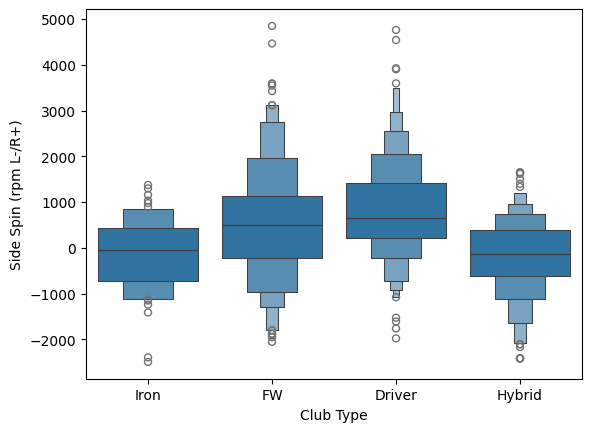

In [6]:
sns.boxenplot(data=data,x='Club Type',y='Side Spin (rpm L-/R+)')

C:\Users\rhoffpauir\AppData\Local\Temp\ipykernel_41772\1628060441.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Club Name', y='Carry (yds)', data=data, palette='Set1',fill=False)
C:\Users\rhoffpauir\AppData\Local\Temp\ipykernel_41772\1628060441.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Club Name', y='Carry (yds)', data=data, palette='Set1', alpha=0.5, linewidth=0.5)


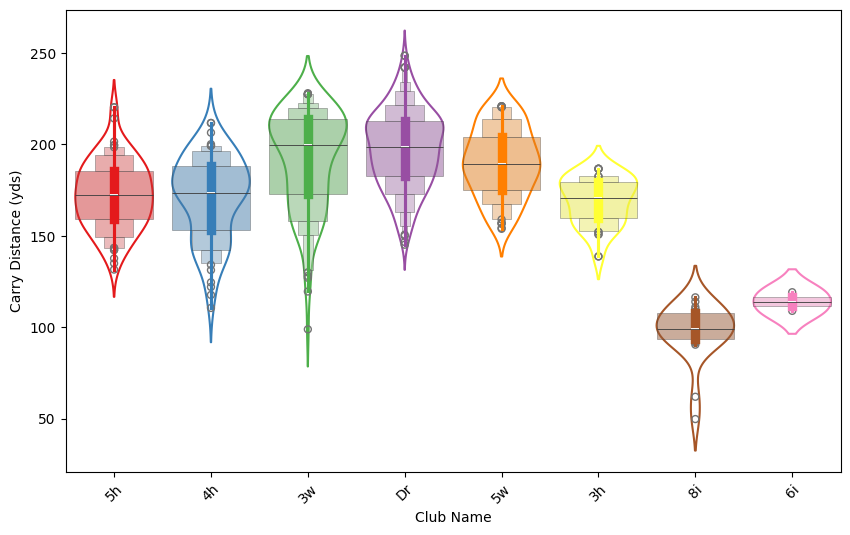

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize carry distance distribution
plt.figure(figsize=(10, 6))
sns.violinplot(x='Club Name', y='Carry (yds)', data=data, palette='Set1',fill=False)
sns.boxenplot(x='Club Name', y='Carry (yds)', data=data, palette='Set1', alpha=0.5, linewidth=0.5)
plt.title = 'Carry Distance Distribution by Club'
plt.xlabel('Club Name')
plt.ylabel('Carry Distance (yds)')
plt.xticks(rotation=45)
plt.show()


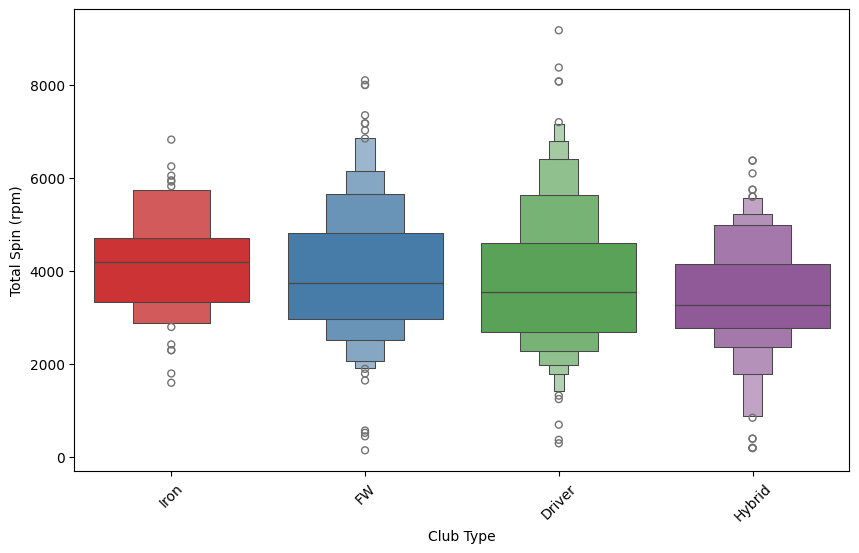

In [8]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Club Type', y='Total Spin (rpm)', data=data, palette='Set1', hue='Club Type',legend=False)
plt.title= ('Total Spin (rpm) Distribution by Club')
plt.xlabel('Club Type')
plt.ylabel('Total Spin (rpm)')
plt.xticks(rotation=45)
plt.show()

C:\Users\rhoffpauir\AppData\Local\Temp\ipykernel_41772\2257589242.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Club Name', y='Push/Pull (deg L-/R+)', data=data, palette="Set1")


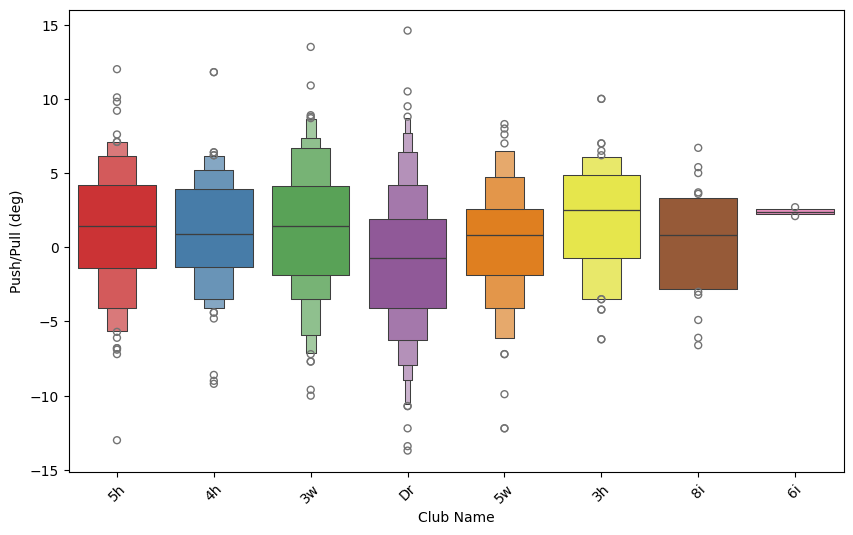

In [9]:
# Visualize accuracy (Push/Pull) distribution
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Club Name', y='Push/Pull (deg L-/R+)', data=data, palette="Set1")
plt.title = ('Push/Pull Distribution by Club')
plt.xlabel('Club Name')
plt.ylabel('Push/Pull (deg)')
plt.xticks(rotation=45)
plt.show()


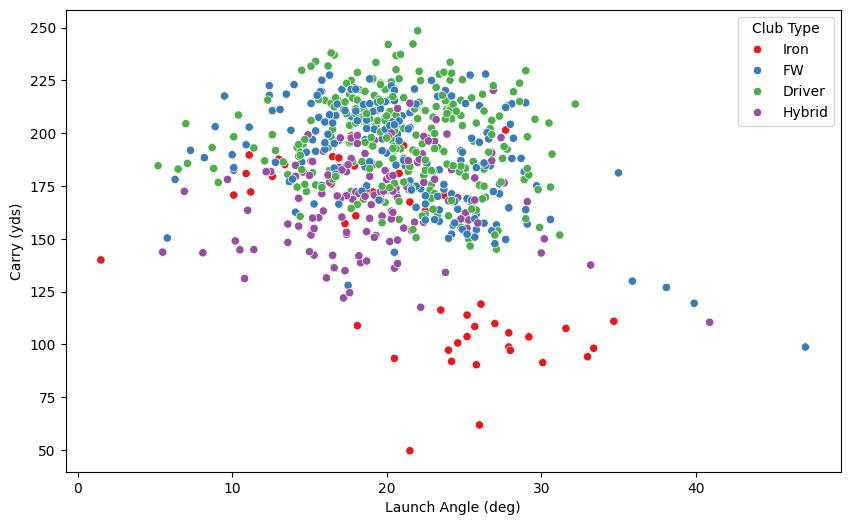

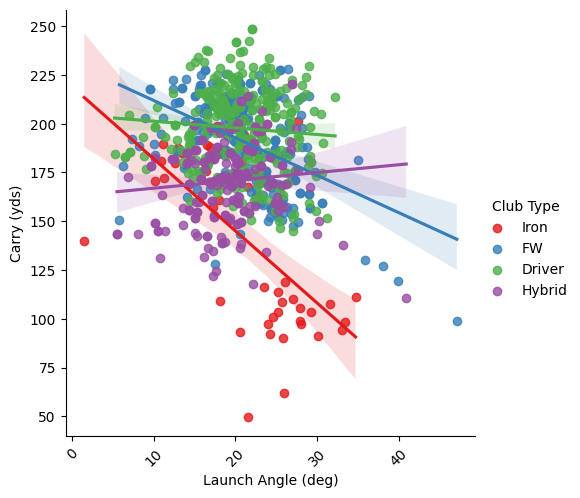

In [10]:
# Visualize launch angle and Carry
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Launch Angle (deg)', y='Carry (yds)',hue = 'Club Type' ,data=data, palette='Set1')
plt.title='Launch Angle and Carry relationship'
sns.lmplot(x='Launch Angle (deg)', y='Carry (yds)', data=data, hue='Club Type', palette='Set1')
plt.xticks(rotation=45)
plt.show()


C:\Users\rhoffpauir\AppData\Local\Temp\ipykernel_41772\1853431520.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Club Name', y='Ball Speed (mph)', data=data, palette='Set1', alpha=0.5)
C:\Users\rhoffpauir\AppData\Local\Temp\ipykernel_41772\1853431520.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Club Name', y='Ball Speed (mph)', data=data,  palette='Set1', fill=False)


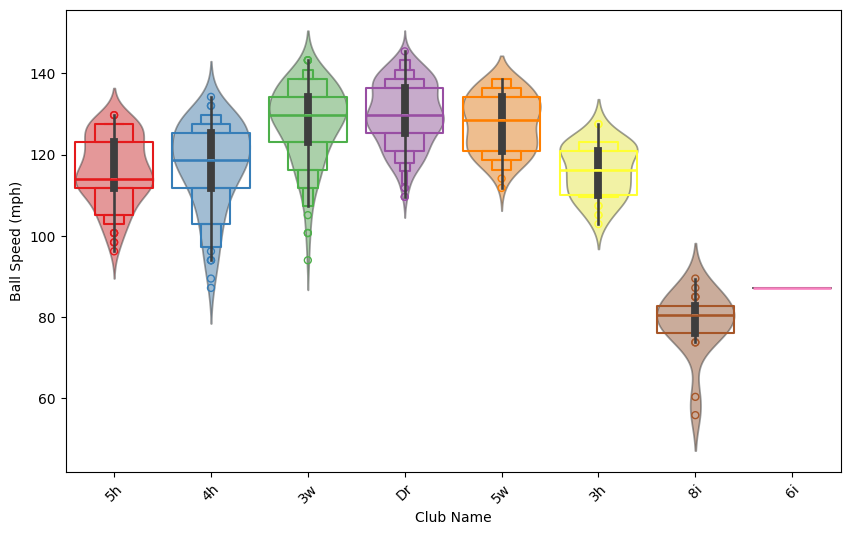

In [11]:
# Visualize accuracy (Push/Pull) distribution
plt.figure(figsize=(10, 6))
sns.violinplot(x='Club Name', y='Ball Speed (mph)', data=data, palette='Set1', alpha=0.5)
sns.boxenplot(x='Club Name', y='Ball Speed (mph)', data=data,  palette='Set1', fill=False)
plt.title = ('Ball Speed (mph) Distribution by Club')
plt.xlabel('Club Name')
plt.ylabel('Ball Speed (mph)')
plt.xticks(rotation=45)
plt.show()


TypeError: 'str' object is not callable

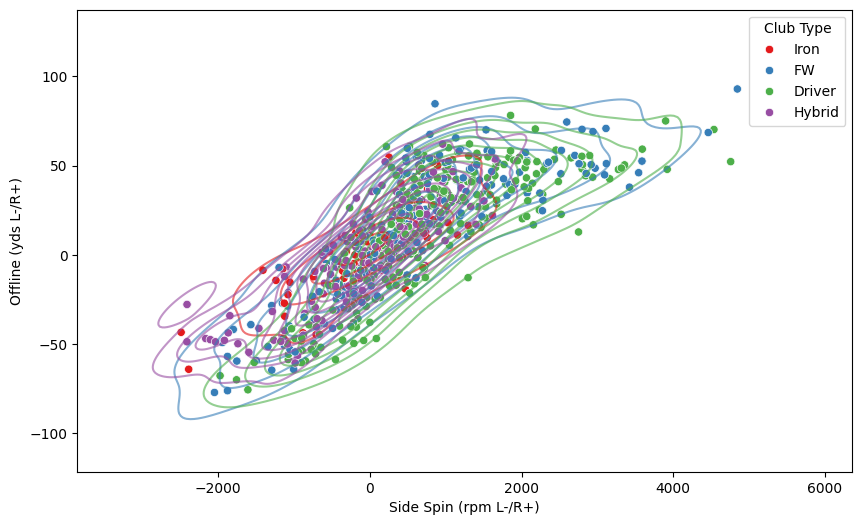

In [12]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='Side Spin (rpm L-/R+)', y='Offline (yds L-/R+)', data=data,palette='Set1', hue='Club Type', alpha=0.6)
sns.scatterplot(x='Side Spin (rpm L-/R+)', y='Offline (yds L-/R+)', data=data,legend=True, hue='Club Type', palette='Set1')
plt.title('Side Spin relation to Offline')
plt.xlabel('Side Spin (rpm L-/R+)')
plt.ylabel('Offline (yds L-/R+)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calculate efficiency (smash factor) summary
efficiency_summary = data.groupby('Club Name').agg({
    'Club Speed (mph)': ['mean', 'std'],
    'Ball Speed (mph)': ['mean', 'std'],
    'Carry (yds)': ['mean', 'std'],
    'Launch Angle (deg)': ['mean', 'std']

}).reset_index()

# Flatten the multi-level columns
efficiency_summary.columns = ['Club Name','Club Speed Mean', 'Club Speed Std', 
                              'Ball Speed Mean', 'Ball Speed Std', 'Carry Mean',
                              'Carry Std','Launch Angle Mean', 'Launch Angle Std']
efficiency_summary
#efficiency_summary.to_csv("Metrics/Std_Mean_by_Club.csv",index=False)


,Club Name,Club Speed Mean,Club Speed Std,Ball Speed Mean,Ball Speed Std,Carry Mean,Carry Std,Launch Angle Mean,Launch Angle Std
0,3h,86.075838,4.754762,116.202381,6.418929,169.069048,13.115823,16.747619,3.113766
1,3w,88.098746,6.650316,127.743182,9.642958,191.768182,26.956434,20.638636,6.130143
2,4h,87.663055,8.826220,117.124719,10.717853,170.874157,22.969676,18.046067,5.309624
3,5h,86.922080,7.002299,116.000000,8.338486,172.343434,18.666315,20.216162,4.809143
4,5w,87.969186,4.776523,127.555319,6.925959,190.073404,18.760860,21.176596,5.365575
5,6i,69.760000,0.000000,87.200000,0.000000,114.000000,5.888973,22.100000,4.618802
6,8i,62.891429,6.333473,78.614286,7.916841,97.390476,15.665930,27.095238,3.775722
7,Dr,83.747142,5.091608,129.808070,7.891993,197.622456,21.286663,20.693684,4.925158


In [ ]:
data['Spin Efficiency'] = (data['Back Spin (rpm)'] + data['Side Spin (rpm L-/R+)']) / data['Ball Speed (mph)']

In [ ]:
data['Spin Efficiency']

0       32.898032
1       36.803045
2       52.987478
3       40.756664
4       48.145695
          ...    
1523    22.276423
1524    26.878762
1525    23.516020
1526    47.826476
1527    28.894309
Name: Spin Efficiency, Length: 1528, dtype: float64

In [13]:
# Save the updated DataFrame to a new CSV file
updated_file_path = 'updated_metrics_gulftee.csv'  # Update this path
data.to_csv(updated_file_path, index=False)
print(f"Updated CSV saved to {updated_file_path}")

Updated CSV saved to updated_metrics_gulftee.csv
